# Heart Failure Prediction Using Decision Tree and Random Forest
Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, metrics

In [16]:
cm = pd.read_csv('C:/Users/rosyi/Videos/Machine Learning/Day 14. Supervised Learning - Classification/heart.csv')
cm.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
cm.info()

# Tidak ada data Nan Sehingga bisa langung menggunakan One Hot Decoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Cleansing Data

In [18]:
# Mengecek porsi dari 0 dan 1 dari label
cm['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

c:\Users\rosyi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

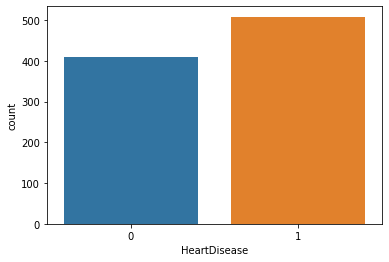

In [19]:
# visualisasi dari imbalance pada label
import seaborn as sns
sns.countplot(cm['HeartDisease'])

Data pada label tidak seimbang, maka dari itu perlu diseimbangkan data label 0 dan 1

In [22]:
# Menyeimbangkan jumlah 0 dan 1 pada label dengan minority class
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
cm_majority = cm[(cm['HeartDisease']==1)] 
cm_minority = cm[(cm['HeartDisease']==0)] 
# downsample majority class
cm_majority_downsampled = resample(cm_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 410, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
cm_downsampled = pd.concat([cm_majority_downsampled, cm_minority])

In [23]:
cm_downsampled['HeartDisease'].value_counts()

1    410
0    410
Name: HeartDisease, dtype: int64

Jumlah data pada label sudah seimbang antara 0 dan 1

#### One-Hot Encoding

In [24]:
OHD_cm = pd.get_dummies(cm_downsampled , columns=['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope'])
OHD_cm

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
272,55,140,201,0,130,3.0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
760,53,123,282,0,95,2.0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
585,57,180,285,1,120,0.8,1,0,1,0,...,0,0,0,0,1,1,0,0,1,0
483,58,120,0,0,106,1.5,1,0,1,1,...,0,0,1,0,0,0,1,1,0,0
293,65,115,0,0,93,0.0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,130,221,0,163,0.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
904,56,120,240,0,169,0.0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
906,55,132,342,0,166,1.2,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
910,41,120,157,0,182,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


#### Create X and Y variable for training and testing

In [25]:
X = OHD_cm.loc[:, OHD_cm.columns != 'HeartDisease']
y = OHD_cm['HeartDisease']

In [26]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
272,55,140,201,0,130,3.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
760,53,123,282,0,95,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
585,57,180,285,1,120,0.8,0,1,0,1,0,0,0,0,1,1,0,0,1,0
483,58,120,0,0,106,1.5,0,1,1,0,0,0,1,0,0,0,1,1,0,0
293,65,115,0,0,93,0.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,130,221,0,163,0.0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
904,56,120,240,0,169,0.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
906,55,132,342,0,166,1.2,1,0,0,1,0,0,0,1,0,1,0,0,0,1
910,41,120,157,0,182,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1


#### Create Training and Testing data

In [93]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

#### Train two models with X_train and y_train using Decision Tree and Random Forest. (for random forest using hyperparameter tuning)

In [94]:
# Decision Tree

from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [95]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_19 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_5 <= 0.15
|   |   |   |   |--- feature_0 <= 60.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  60.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.15
|   |   |   |   |--- class: 0
|   |   |--- feature_7 >  0.50
|   |   |   |--- feature_17 <= 0.50
|   |   |   |   |--- feature_2 <= 249.50
|   |   |   |   |   |--- feature_4 <= 129.00
|   |   |   |   |   |   |--- feature_1 <= 115.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  115.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  129.00
|   |   |   |   |   |   |--- feature_2 <= 170.00
|   |   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  170

In [96]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [97]:
# Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [98]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [99]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [100]:
grid_search.best_score_

0.8821138211382114

In [101]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

#### Evaluate the result with confusion matrix, classification report, and AUC

In [105]:
y_dtree = dtree.predict(X_test)
y_rf = rf_best.predict(X_test)

In [107]:
# Accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_rf))

0.8140243902439024
0.8810975609756098


Accuracy dari Random Forest lebih besar daripada decision tree

In [108]:
# Precision
from sklearn.metrics import precision_score

print(precision_score(y_test, y_dtree, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))

0.8150326797385621
0.8812660489003015


Nilai presisi dari random forest lebih besar daripada decision tree

In [110]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))

[[140  26]
 [ 35 127]]
[[148  18]
 [ 21 141]]


Hasil confusion matrix pada random forest lebih baik daripada decision tree.

In [111]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       166
           1       0.83      0.78      0.81       162

    accuracy                           0.81       328
   macro avg       0.82      0.81      0.81       328
weighted avg       0.81      0.81      0.81       328

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       166
           1       0.89      0.87      0.88       162

    accuracy                           0.88       328
   macro avg       0.88      0.88      0.88       328
weighted avg       0.88      0.88      0.88       328



Hasil dari classification report menandakan bahwa model random forest lebih baik daripada decision tree

In [112]:
# AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.8136620556299272
0.8809683177153056


Hasil AUC dari random forest lebih baik daripada decision tree.

#### Conclusion

Hasil dari evaluasi yang ada pada kedua model yaitu Decision Tree dan random forest menunjukkan bahwa model dari random forest lebih baik daripada decision tree pada dataset heart.csv. Hal ini ditunjukkan oleh hasil dari confusion matrix yang menunjukkan hasil lebih baik pada random forest daripada decision tree, selain itu hasil dari Classification report yang menunjukkan hasil yang lebih baik pada random forest daripada decision tree. Terakhir nilai AUC yang merupakan peluang antara true positive rate dengan false positive rate, nilai AUC dari random forest lebih tinggi daripada decision tree yang menandakan model dari random forest lebih baik daripada decision tree.